# VLM 001


##Zero Shot Image Classification using CLIP , SigLIP

In this notebook, we will learn about **Zero-Shot Image Classification** using a Vision Language Models (VLM) called CLIP and SigLIP . Let's break down what that means.


 **Image Classification** is a class of techniques where the input is an image and the output is a single class label from a collection of pre-defined classes. For example, given an image of a dog, an image classifier would output the label "dog."

![Alt Image Classification](https://learnopencv.com/wp-content/uploads/2023/01/keras-image-classification-network-inputs-outputs.png)

2.  **Zero Shot** refers to the fact that we will not need any training data to build the classifier.

3. **CLIP (Contrastive Language-Image Pre-training)** is a multimodal model developed by OpenAI that learns to associate images with their textual descriptions, enabling tasks like zero-shot classification and image retrieval.


4. **SigLIP (Sigmoid Loss for Language–Image Pre-training)**: Google’s CLIP-like model that swaps CLIP’s softmax contrastive loss for an independent sigmoid loss—making training less batch-sensitive, scaling to very large batches, and often outperforming CLIP on zero-shot.

In [25]:
# Import necessary libraries
from PIL import Image # Used for image processing
import requests # Used for downloading images from URLs (if needed)
from transformers import CLIPProcessor, CLIPModel # Import CLIP processor and model from Hugging Face Transformers
import torch # Import PyTorch
from PIL import Image, ImageOps
import requests
from io import BytesIO
from IPython.display import display

# Use to display image
from IPython.display import display

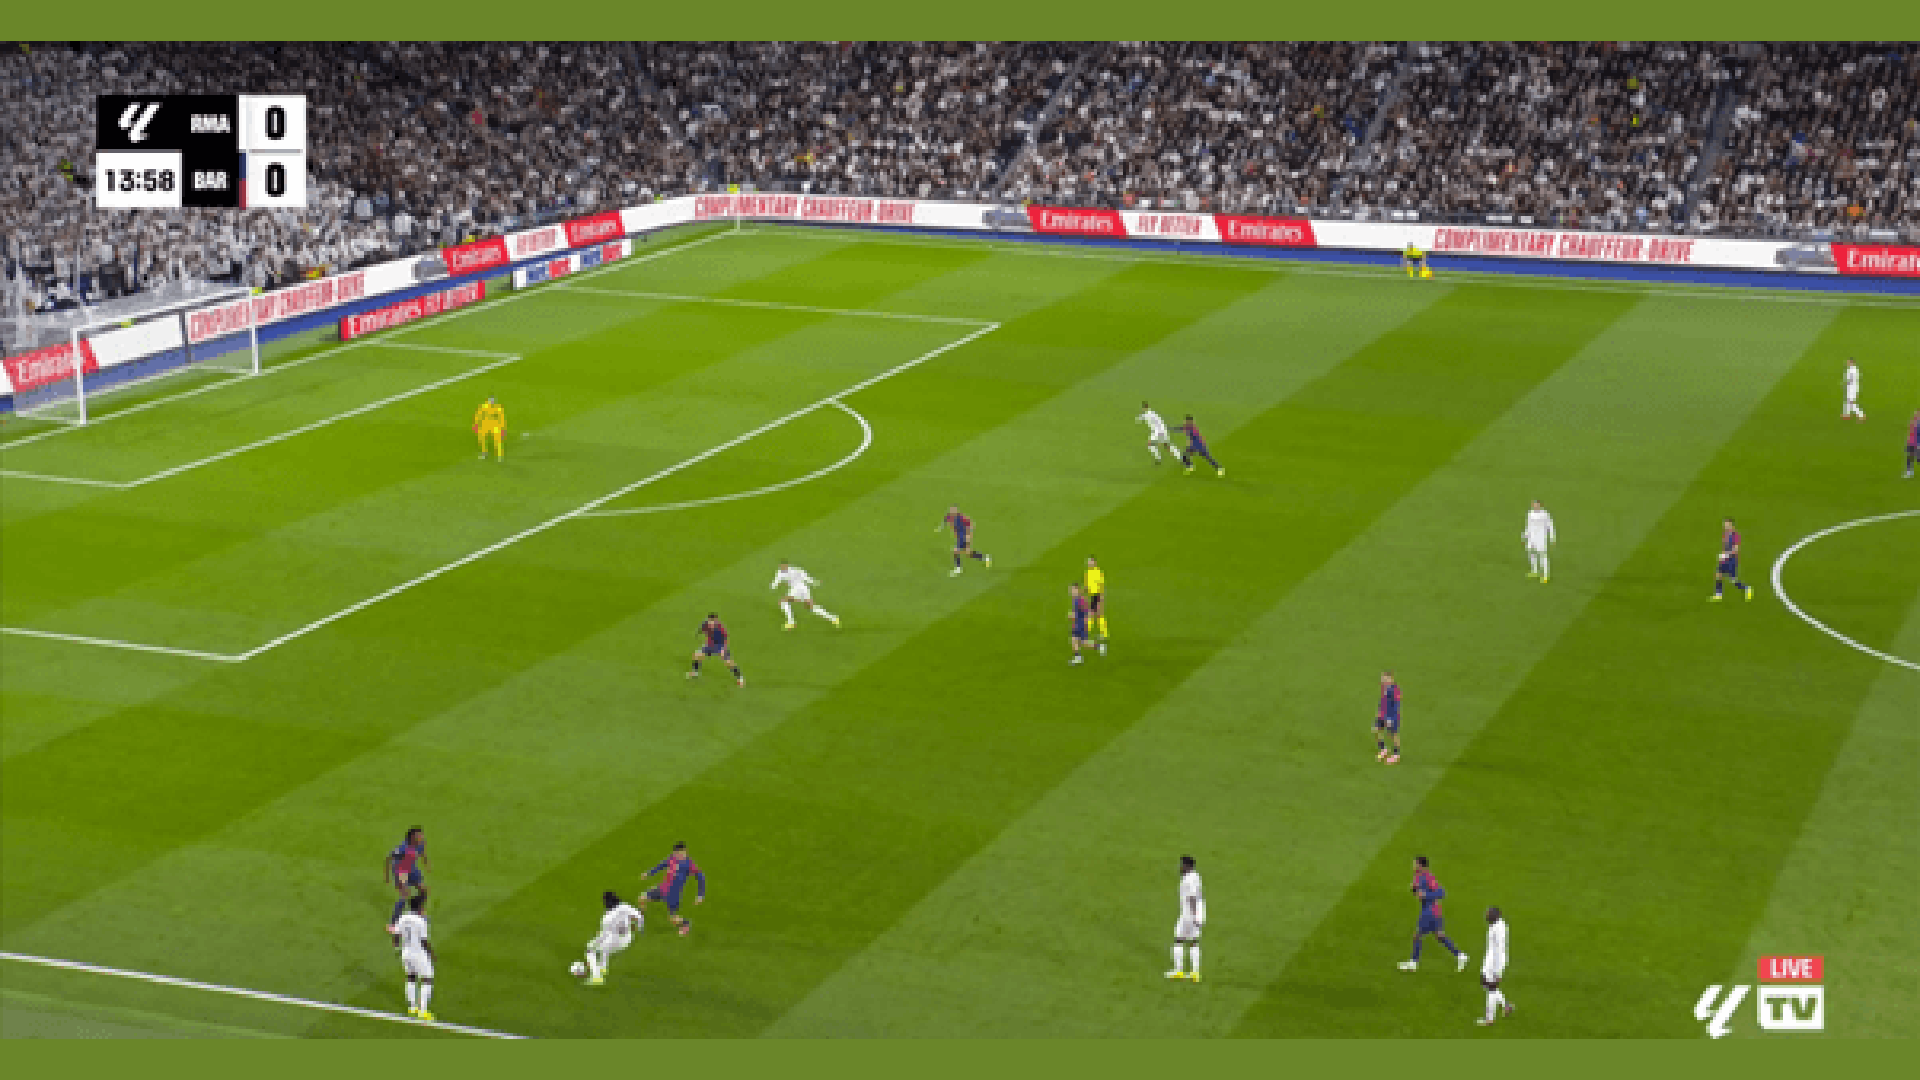

In [26]:

#soccer image
url = "https://static01.nyt.com/athletic/uploads/wp/2024/10/26164448/Clasico-2.png"
im = Image.open(BytesIO(requests.get(url).content))
im = ImageOps.exif_transpose(im)

target = (1920, 1080)
image = ImageOps.pad(im, target, method=Image.Resampling.LANCZOS,
                           color=(0, 0, 0), centering=(0.5, 0.5))

display(image)


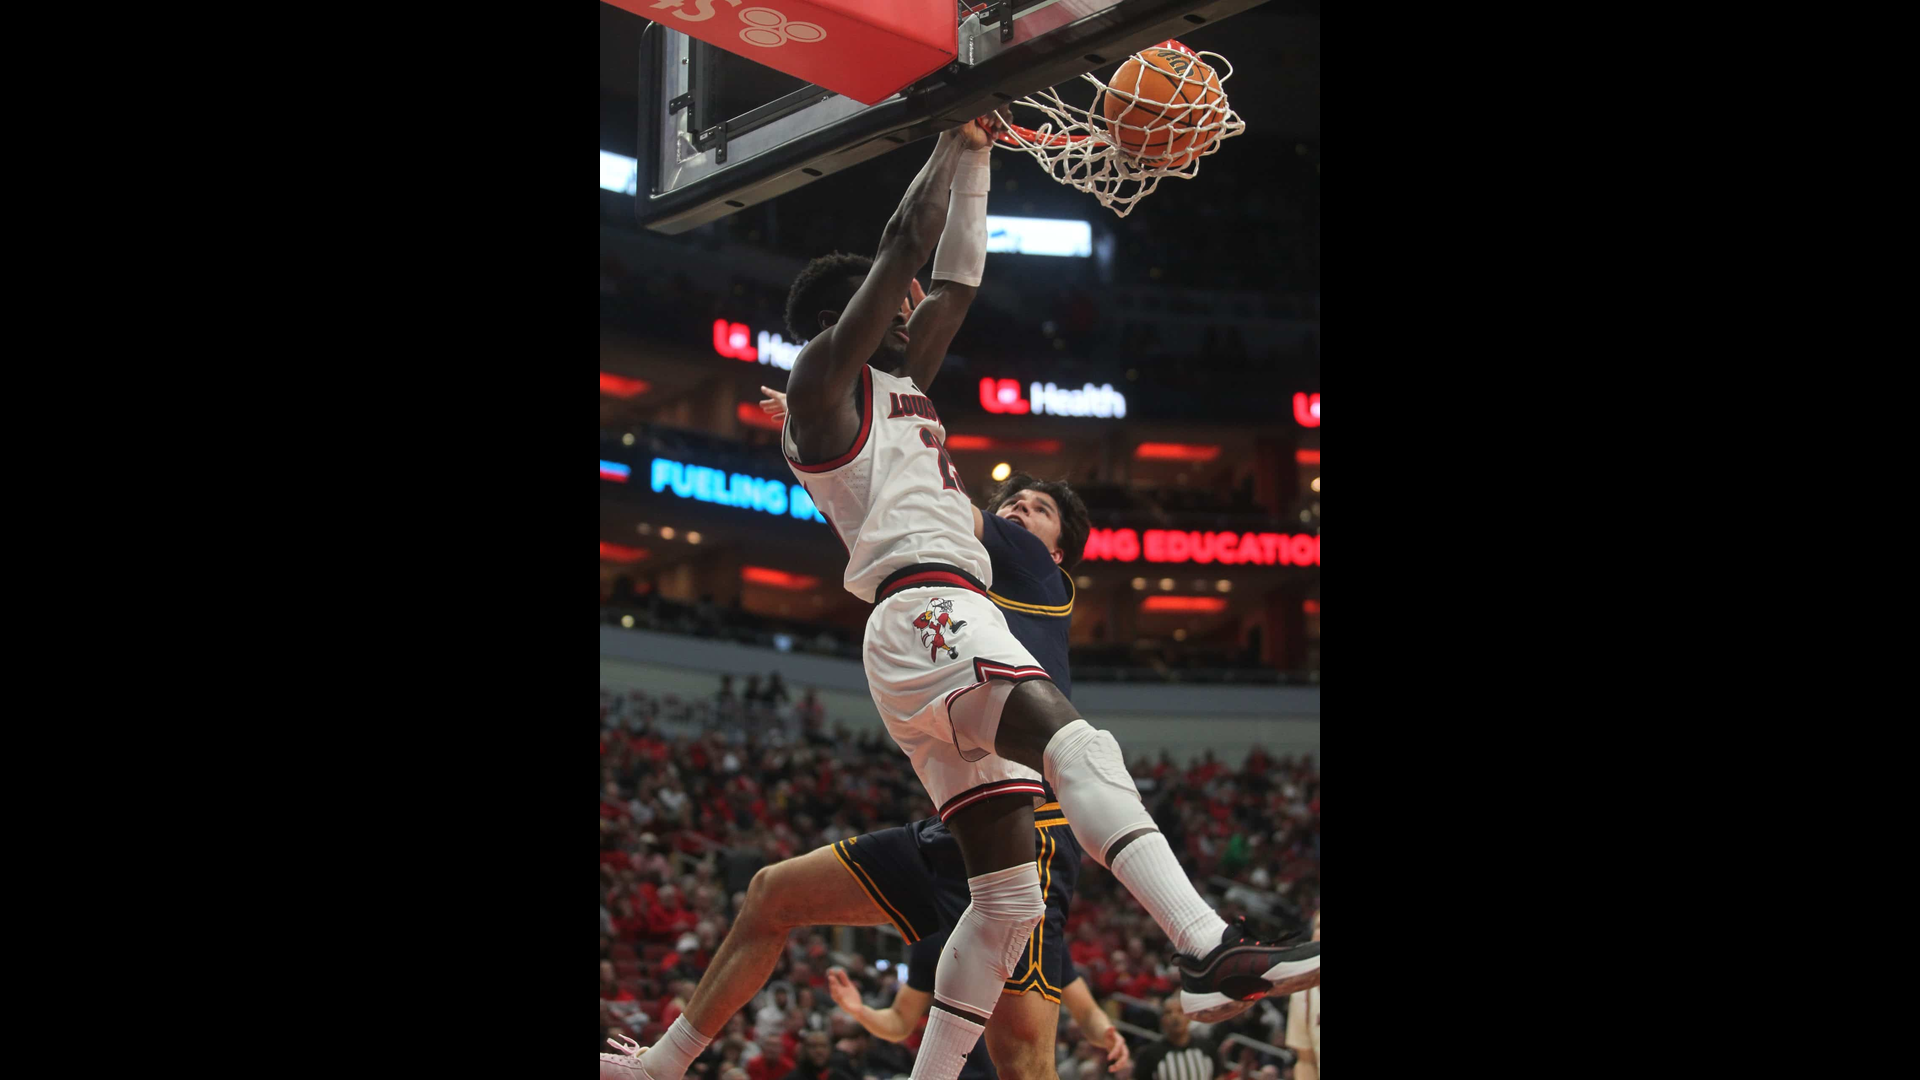

In [27]:
# Basketball image
url = "https://www.louisvillecardinal.com/media/2025/03/VTRM0056-scaled.jpg"
im = Image.open(BytesIO(requests.get(url).content))
im = ImageOps.exif_transpose(im)

target = (1920, 1080)
image = ImageOps.pad(im, target, method=Image.Resampling.LANCZOS,
                           color=(0, 0, 0), centering=(0.5, 0.5))

display(image)


#CLIP

[CLIP](https://huggingface.co/docs/transformers/model_doc/clip) by OpenAI was an amazing model as it has very broad knowledge in linking images with text, as it has been pre-trained on 400 million image-text pairs carefully crafted from the web. It led to many advances in text-to-image and image-to-text advances such as Stable Diffusion, image captioning, VQA, text-based segmentation/object detection, 3D understanding and more.

The architecture of CLIP is very simple: it consists of an image encoder and text encoder (both Transformer-based), and the model is pre-trained in a contrastive way, making sure that the embeddings of images and texts that belong together are close to each other in embedding space, and images and text which don't belong together are far apart.

<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/model_doc/clip_overview.jpg"
alt="drawing" width="600"/>

<small> CLIP overview. Taken from the <a href="https://arxiv.org/abs/2103.00020.06230">original paper</a>. </small>


This code uses a model CLIP for zero-shot learning, which means it can classify images into categories it hasn't been explicitly trained on. In our example, we want to classify an image as either a "tennis", "soccer", or "Basketball".


In [28]:
# Load the pre-trained CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# Load processor
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")



In [29]:
#Basketball iamge
url = "https://www.louisvillecardinal.com/media/2025/03/VTRM0056-scaled.jpg"
im = Image.open(BytesIO(requests.get(url).content))
im = ImageOps.exif_transpose(im)

target = (1920, 1080)
image = ImageOps.pad(im, target, method=Image.Resampling.LANCZOS,
                           color=(0, 0, 0), centering=(0.5, 0.5))

# Define the list of target labels/categories
text = ["Basketball", "Soccer", "Futsal" , "Handball" , "Tennis"]


# Preprocess the text and image using the CLIP processor
# return_tensors="pt" specifies to return PyTorch tensors
# padding=True ensures inputs are padded to the same length
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

# Ensure no gradients are calculated for faster inference.
with torch.no_grad():
  outputs = model(**inputs) # Pass the inputs to the model


logits_per_image = outputs.logits_per_image # Extract the image-text similarity scores
print("Logits Per Image (shape):", logits_per_image.shape) #The higher the score, the more similar the image is to that label.
print(logits_per_image)


probs = logits_per_image.softmax(dim=-1) # Apply softmax to get probabilities for each label
# Print the probabilities for each class
for i, label in enumerate(text): # Loop through the labels and their indices
  print(f"Probability of {label}: {probs[0][i].item()}") # Print the probability for each label

# Get the predicted label
predicted_label = text[probs.argmax()] # Get the label with the highest probability
print(f"\nPredicted Label: {predicted_label}") # Print the predicted label


Logits Per Image (shape): torch.Size([1, 5])
tensor([[25.3061, 17.0084, 15.6371, 19.8421, 17.6235]])
Probability of Basketball: 0.9950156807899475
Probability of Soccer: 0.0002478454262018204
Probability of Futsal: 6.289942393777892e-05
Probability of Handball: 0.0042152549140155315
Probability of Tennis: 0.000458458554930985

Predicted Label: Basketball


In [30]:

#Soccer image
url = "https://static01.nyt.com/athletic/uploads/wp/2024/10/26164448/Clasico-2.png"
im = Image.open(BytesIO(requests.get(url).content))
im = ImageOps.exif_transpose(im)

target = (1920, 1080)
image = ImageOps.pad(im, target, method=Image.Resampling.LANCZOS,
                           color=(0, 0, 0), centering=(0.5, 0.5))

# Define the list of target labels/categories
text = ["Basketball", "Soccer", "Futsal" , "Handball" , "Tennis"]


# Preprocess the text and image using the CLIP processor
# return_tensors="pt" specifies to return PyTorch tensors
# padding=True ensures inputs are padded to the same length
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

# Ensure no gradients are calculated for faster inference.
with torch.no_grad():
  outputs = model(**inputs) # Pass the inputs to the model

logits_per_image = outputs.logits_per_image # Extract the image-text similarity scores

probs = logits_per_image.softmax(dim=-1) # Apply softmax to get probabilities for each label
# Print the probabilities for each class
for i, label in enumerate(text): # Loop through the labels and their indices
  print(f"Probability of {label}: {probs[0][i].item()}") # Print the probability for each label

# Get the predicted label
predicted_label = text[probs.argmax()] # Get the label with the highest probability
print(f"\nPredicted Label: {predicted_label}") # Print the predicted label


Probability of Basketball: 0.0007933522574603558
Probability of Soccer: 0.7805919647216797
Probability of Futsal: 0.15407869219779968
Probability of Handball: 0.06392364948987961
Probability of Tennis: 0.0006123223574832082

Predicted Label: Soccer


#SigLIP


`SigLIP` by ([Researchers at Google now found](https://arxiv.org/abs/2303.15343)  is a CLIP-style image–text model that replaces CLIP’s in-batch softmax (InfoNCE) with a pairwise sigmoid loss. In practice, this makes training more data/batch-size efficient and often improves zero-shot classification and retrieval—while keeping the same high-level recipe: an image encoder and a text encoder (both Transformers) that map inputs into a shared embedding space.


By adopting a sigmoid loss, the model scales to extremely large pre-training batches (e.g., ~32k pairs) and simultaneously exhibits superior performance at small batch sizes. Empirically, it outperforms CLIP on zero-shot image classification and image–text retrieval.

<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/model_doc/siglip_table.jpeg"
alt="drawing" width="600"/>

* SigLIP docs: https://huggingface.co/docs/transformers/main/en/model_doc/siglip.

In [31]:
from transformers import AutoProcessor, AutoModel

processor = AutoProcessor.from_pretrained("google/siglip-so400m-patch14-384")
model = AutoModel.from_pretrained("google/siglip-so400m-patch14-384")


In [32]:
# Define the list of target labels/categories
text = ["Basketball", "Soccer", "Futsal" , "Handball" , "Tennis"]

def to_rgb(img: Image.Image) -> Image.Image:
    # Handles P/L/RGBA/LA robustly
    if img.mode == "RGB":
        return img
    if img.mode in ("RGBA", "LA"):
        bg = Image.new("RGB", img.size, (0, 0, 0))
        # use alpha channel as mask
        bg.paste(img, mask=img.getchannel("A"))
        return bg
    return img.convert("RGB")

#Soccer image
url = "https://static01.nyt.com/athletic/uploads/wp/2024/10/26164448/Clasico-2.png"
im = Image.open(BytesIO(requests.get(url).content))
im = ImageOps.exif_transpose(im)

target = (1920, 1080)
image = to_rgb(ImageOps.pad(im, target, method=Image.Resampling.LANCZOS,
                           color=(0, 0, 0), centering=(0.5, 0.5))
)

inputs = processor(text=text, images=image, padding="max_length", return_tensors="pt")



with torch.no_grad():
  outputs = model(**inputs)

logits_per_image = outputs.logits_per_image
probs = torch.sigmoid(logits_per_image) # these are the probabilities
print(f"{probs[0][0]:.1%} that image  is '{text[0]}'")
print(f"{probs[0][1]:.1%} that image  is '{text[1]}'")
print(f"{probs[0][2]:.1%} that image  is '{text[2]}'")
print(f"{probs[0][3]:.1%} that image  is '{text[3]}'")
print(f"{probs[0][4]:.1%} that image  is '{text[4]}'")

0.0% that image  is 'Basketball'
17.3% that image  is 'Soccer'
0.8% that image  is 'Futsal'
0.2% that image  is 'Handball'
0.0% that image  is 'Tennis'


In [33]:
# Define the list of target labels/categories
text = ["Basketball", "Soccer", "Futsal" , "Handball" , "Tennis"]

def to_rgb(img: Image.Image) -> Image.Image:
    # Handles P/L/RGBA/LA robustly
    if img.mode == "RGB":
        return img
    if img.mode in ("RGBA", "LA"):
        bg = Image.new("RGB", img.size, (0, 0, 0))
        # use alpha channel as mask
        bg.paste(img, mask=img.getchannel("A"))
        return bg
    return img.convert("RGB")

#Basketball image
url = "https://www.louisvillecardinal.com/media/2025/03/VTRM0056-scaled.jpg"
im = Image.open(BytesIO(requests.get(url).content))
im = ImageOps.exif_transpose(im)

target = (1920, 1080)
image = to_rgb(ImageOps.pad(im, target, method=Image.Resampling.LANCZOS,
                           color=(0, 0, 0), centering=(0.5, 0.5))
)

inputs = processor(text=text, images=image, padding="max_length", return_tensors="pt")

with torch.no_grad():
  outputs = model(**inputs)

logits_per_image = outputs.logits_per_image
probs = torch.sigmoid(logits_per_image) # these are the probabilities
print(f"{probs[0][0]:.1%} that image  is '{text[0]}'")
print(f"{probs[0][1]:.1%} that image  is '{text[1]}'")
print(f"{probs[0][2]:.1%} that image  is '{text[2]}'")
print(f"{probs[0][3]:.1%} that image  is '{text[3]}'")
print(f"{probs[0][4]:.1%} that image  is '{text[4]}'")

7.8% that image  is 'Basketball'
0.0% that image  is 'Soccer'
0.0% that image  is 'Futsal'
0.0% that image  is 'Handball'
0.0% that image  is 'Tennis'
